In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

np.random.seed(42)

df = pd.read_csv('housing.csv')

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Basic distributions for each column.

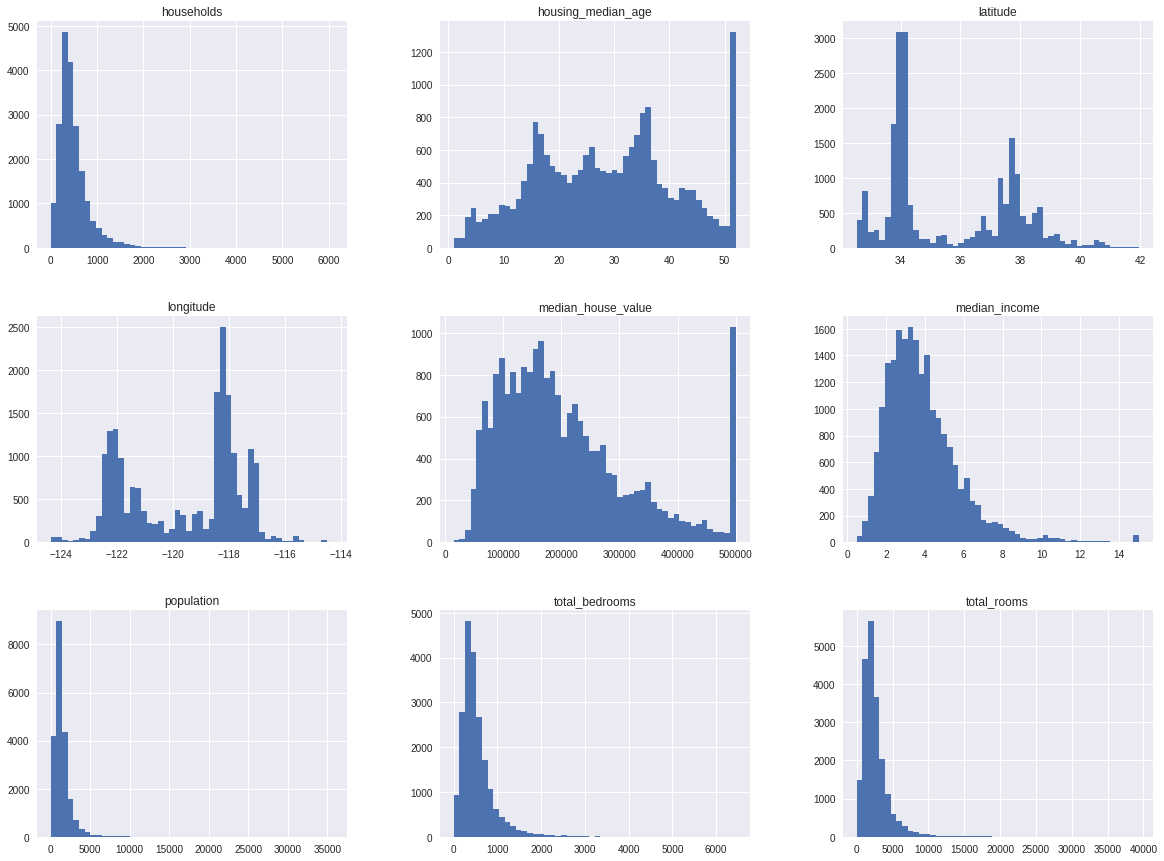

In [0]:
df.hist(bins=50, figsize=(20,15));
plt.show()

<ipython-input-2-605e2479fdd9>:17: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cmap = "rainbow")
<ipython-input-2-605e2479fdd9>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


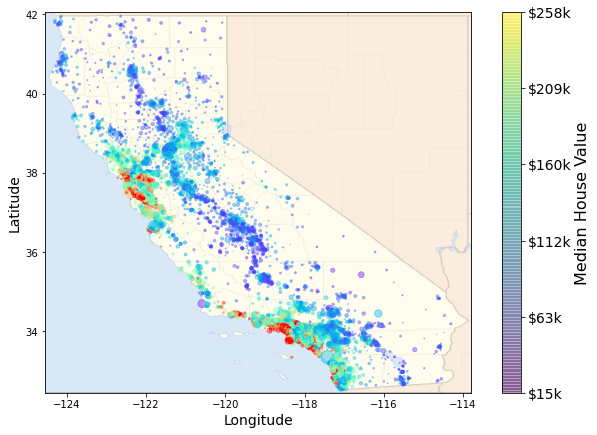

In [2]:
cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
cali = plt.imread(cali_image_url)

# plot the populations with density and colors
ax = df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
    s = df["population"]/200, figsize = (11,7),
    c = "median_house_value", cmap = plt.get_cmap("rainbow"), colorbar = False,
    sharex = True)

# show the image of California in the back
plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.4)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(cmap = "rainbow")
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)


plt.show()

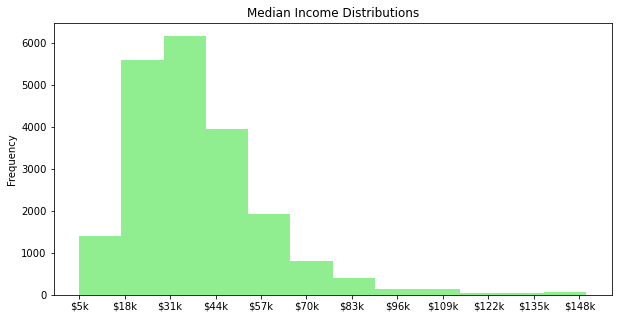

In [3]:
ran = np.arange(df['median_income'].min() ,df['median_income'].max(), 1.3)
ticks = ['${:.0f}k'.format(v*10) for v in ran]


df["median_income"].plot.hist(bins = len(ran), figsize = [10,5], color = 'lightgreen')
plt.xticks(ran, ticks)
plt.title('Median Income Distributions')
plt.show()

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df = pd.get_dummies(df)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


check for missing values.

In [6]:
# check for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0] # normalize
print(f'{missing_values *100} %')

total_bedrooms    1.002907
dtype: float64 %


About 1% of the total_bedrooms feature is missing.

In [7]:
for feature in df.columns:
    df[feature].fillna(df[feature].median(), inplace=True)

In [8]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [11]:
def assignment(X, centroids):
  
  distances = []
  
  for row in X.values:
    arr = []
    for j in centroids:
      arr.append(
        # use the euclidian distances
        np.linalg.norm(row - np.array(centroids[j])) 
      )
    arr.append(np.argmin(arr)) 
    distances.append(arr)
          
  return distances

def update(X, centroids, distances):
  
  for c in centroids:
    indicies = [distances.index(row) for row in distances if row[-1] == c]
    
    # update the centroids with the means of each cluster
    centroids[c] = X.iloc[indicies].mean().values 
    
  return centroids


def KMeans(X, k):

    # initialize random centroids
        
    mins = X.min().values
    maxs = X.max().values
    
    centroids = {
        i: [np.random.uniform(mins, maxs)]
        for i in range(k)
    }
    
    distances = assignment(X, centroids)    
    
    # iterate until assignments remain within a certain tolerance
    while True:
      
      old = [x[-1] for x in distances]
    
      centroids = update(X, centroids, distances)
     
      distances = assignment(X, centroids)
      
      new = [x[-1] for x in distances]
      
      if np.allclose(old, new, 100*k, 1.0e+1):
        break
      
      
    return distances, centroids

In [13]:
def J(X, K):
    
    means = []
    stds = []
    
    for k in range(1, K + 1):
        dist, c = KMeans(X, k)
        mean = []
        std = []
        for i in range(k):
          di = [x[i] for x in dist if x[-1] == i]
          mean.append(np.average(di))
          std.append(np.std(di))
          
        stds.append(np.mean(std))
        means.append(np.mean(mean))
        
    
    return means, stds

In [14]:
K = 10

means, stds = J(df.sample(5000), K)

C:\Users\Riyas\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Riyas\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Riyas\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Riyas\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Riyas\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Riyas\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Riyas\an

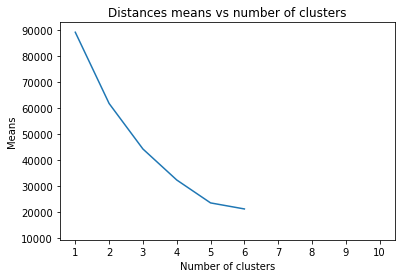

In [15]:
plt.plot(np.arange(1, K+1), means);
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, K+1))
plt.title('Distances means vs number of clusters')
plt.ylabel('Means')
plt.show()

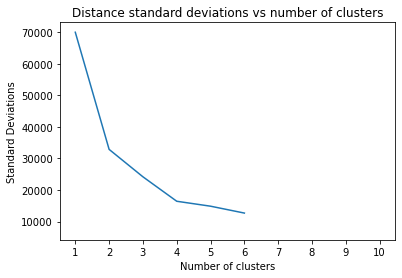

In [16]:
plt.plot(np.arange(1, K+1), stds);
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, K+1))
plt.title('Distance standard deviations vs number of clusters')
plt.ylabel('Standard Deviations')
plt.show()

In [17]:
k = 3

dist, cent = KMeans(df, k)

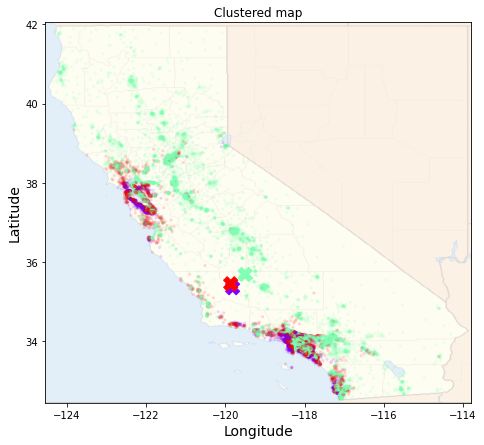

In [18]:
x, y = [cent[i][0] for i in cent], [cent[i][1] for i in cent]

df.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1,
    s = 5, figsize = (10,7), colorbar = False,
    c = np.array(dist)[:,-1], cmap = plt.get_cmap("rainbow"),
    sharex=False)

plt.scatter(x, y, marker='X', alpha = 1.0, c = [u for u in cent], cmap = plt.get_cmap("rainbow"), s = 200)

plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Clustered map')

plt.show()

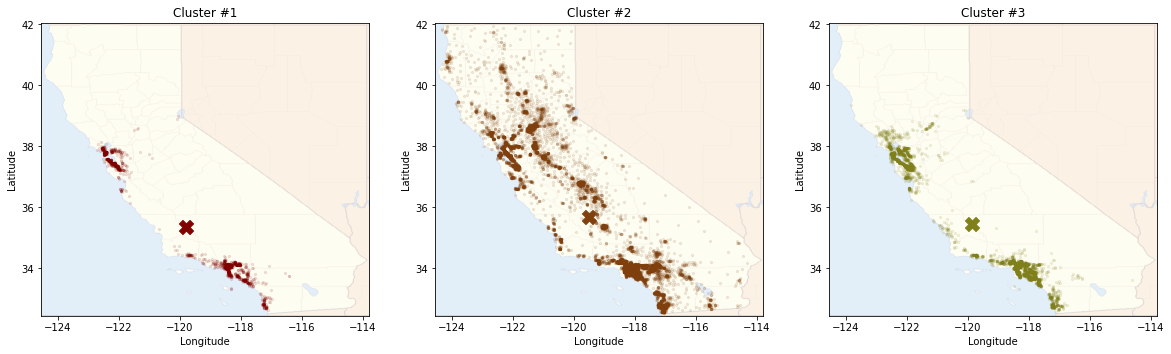

In [19]:
fig = plt.figure(figsize=(20, 30))


for c in range(k):

    ind = [dist.index(x) for x in dist if x[-1] == c]
    
    colormap = [[0.5, c / 2 / (k-1) , 0.1*(c/(k-1))]]

    
    ax = fig.add_subplot(1, k, c+1)
    ax.scatter(x = df['longitude'].iloc[ind], y = df['latitude'].iloc[ind], alpha = 0.1,
        s = 5, c = colormap)


    ax.scatter(x[c], y[c], marker='X', alpha = 1.0, c = colormap, s = 200)

    ax.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.3)
    ax.set(ylabel = "Latitude", xlabel = "Longitude", title = "Cluster #{}".format(c+1))

plt.show()

In [20]:
cols = ['Distance to cluster #{}'.format(x+1) for x in range(k)] + ['Assignments']


diss = pd.DataFrame(dist, columns=cols)

df2 = pd.concat((df, diss), axis =1)

In [21]:
from IPython import display

for c in range(k):
    s = df2[df2['Assignments'] == c].mean()
    print('\nCluster #{}\n'.format(c+1))
    display.display(s)


Cluster #1



longitude                       -119.785663
latitude                          35.322640
housing_median_age                33.181613
total_rooms                     2958.275240
total_bedrooms                   517.750705
population                      1171.328257
households                       484.994924
median_income                      6.903451
median_house_value            473773.302312
ocean_proximity_<1H OCEAN          0.530739
ocean_proximity_INLAND             0.038917
ocean_proximity_ISLAND             0.001692
ocean_proximity_NEAR BAY           0.211506
ocean_proximity_NEAR OCEAN         0.217146
Distance to cluster #1         33093.840153
Distance to cluster #2        315130.949059
Distance to cluster #3        141696.201218
Assignments                        0.000000
dtype: float64


Cluster #2



longitude                       -119.453386
latitude                          35.712107
housing_median_age                27.939535
total_rooms                     2471.520657
total_bedrooms                   526.507114
population                      1450.667784
households                       486.751915
median_income                      3.199406
median_house_value            145561.483995
ocean_proximity_<1H OCEAN          0.393434
ocean_proximity_INLAND             0.422230
ocean_proximity_ISLAND             0.000000
ocean_proximity_NEAR BAY           0.083242
ocean_proximity_NEAR OCEAN         0.101094
Distance to cluster #1        320979.840344
Distance to cluster #2         46280.867359
Distance to cluster #3        186555.457434
Assignments                        1.000000
dtype: float64


Cluster #3



longitude                       -119.879967
latitude                          35.484712
housing_median_age                29.152814
total_rooms                     3066.516600
total_bedrooms                   580.373911
population                      1444.858017
households                       549.632682
median_income                      4.915356
median_house_value            306426.913115
ocean_proximity_<1H OCEAN          0.575230
ocean_proximity_INLAND             0.072757
ocean_proximity_ISLAND             0.000471
ocean_proximity_NEAR BAY           0.164351
ocean_proximity_NEAR OCEAN         0.187191
Distance to cluster #1        160132.564847
Distance to cluster #2        147805.129431
Distance to cluster #3         43256.689422
Assignments                        2.000000
dtype: float64